In [270]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt 


In [41]:
covid_india_raw = pd.read_csv('covid-19-india-datasets/covid_19_india.csv')
covid_india_raw.head(5)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [42]:
covid_india_raw.shape

(18110, 9)

In [43]:
#check data types in dataframe
covid_india_raw.dtypes

Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

* Plot the month-on-month Covid positive numbers state wise
* Display the top 3 states for the month of June.

In [45]:
#convert column to date
covid_india_raw['Date'] = pd.to_datetime(covid_india_raw['Date'])
#year_month
covid_india_raw['month'] = pd.to_datetime(covid_india_raw['Date']).dt.to_period('M')
#or 
covid_india_raw['year_month'] = covid_india_raw['Date'].dt.strftime('%Y_%m')
#or
covid_india_raw['month_two_digits'] = covid_india_raw['Date'].dt.strftime('%m')


#year_week
#'%U' represents the week number of the year (Sunday as the first day of the week) 
#as a zero padded decimal number. All days in a new year preceding the first Sunday 
#are considered to be in week 0. alternative is %V
covid_india_raw['year_week'] = covid_india_raw['Date'].dt.strftime('%Y-%U')

covid_india_raw.head(5)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,month,month_two_digits,year_week,year_month
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,2020-01,01,2020-04,2020_01
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,2020-01,01,2020-04,2020_01
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2020-02,02,2020-04,2020_02
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,2020-02,02,2020-05,2020_02
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,2020-02,02,2020-05,2020_02


In [29]:
monthly_by_state = covid_india_raw.groupby(by=['State/UnionTerritory','year_month'], sort=True).agg({'Confirmed':'sum'}).reset_index()
monthly_by_state.head()

,State/UnionTerritory,year_month,Confirmed
0,Andaman and Nicobar Islands,2020-03,36
1,Andaman and Nicobar Islands,2020-04,485
2,Andaman and Nicobar Islands,2020-05,1023
3,Andaman and Nicobar Islands,2020-06,1352
4,Andaman and Nicobar Islands,2020-07,6372


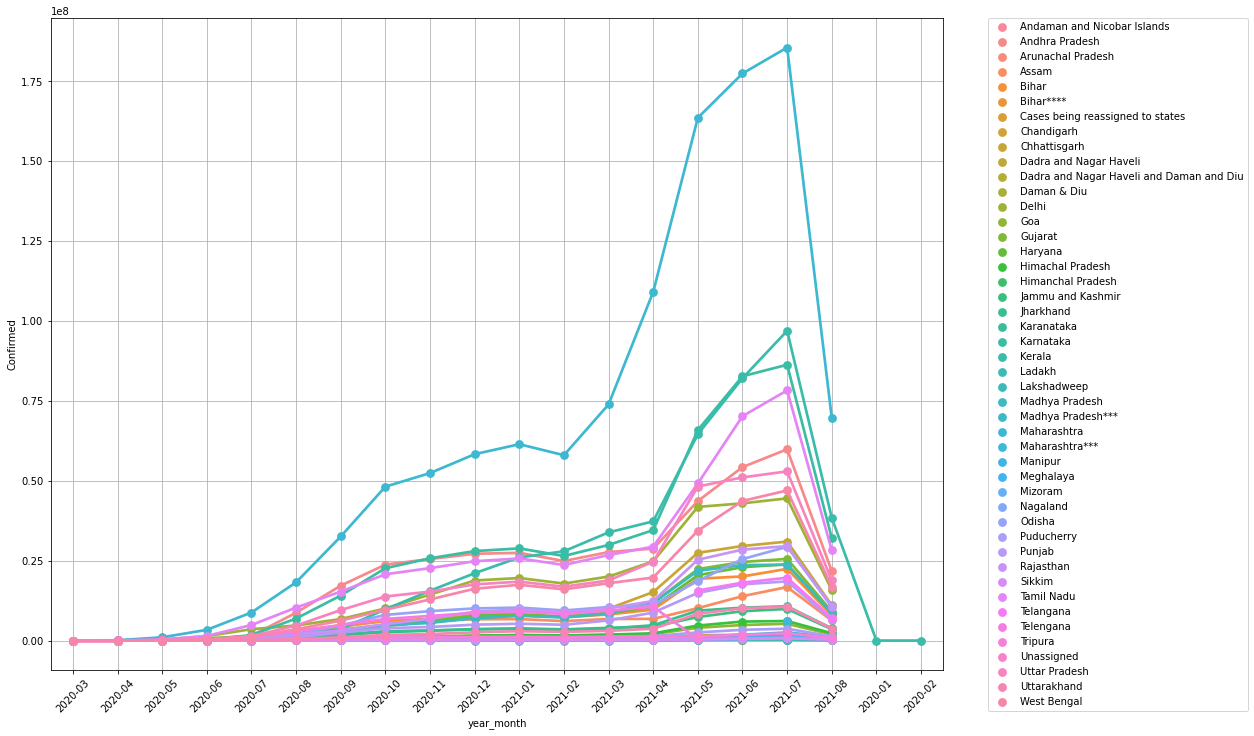

In [31]:
fig, ax = plt.subplots(figsize=(16,12));

sns.pointplot(x='year_month', y='Confirmed', hue='State/UnionTerritory', data=monthly_by_state, ax=ax)
ax.tick_params(axis='x', rotation=45)
ax.grid()
#take legend outside of graph
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show()

In [48]:
#top 3 for month June 2021 
top_3 = (monthly_by_state[monthly_by_state['year_month'] == '2021-06']
 .sort_values(by=['Confirmed'], ascending=False)
 .reset_index()
 .drop('index', axis=1)
 .head(3)
)

#start index at 1
top_3.index = top_3.index + 1
top_3

,State/UnionTerritory,year_month,Confirmed
1,Maharashtra,2021-06,177421994
2,Karnataka,2021-06,82689874
3,Kerala,2021-06,82082292


* Create a dummy Dataset that has sensor values

In [103]:
df1 = pd.DataFrame()
df1['Timestamp'] = ['12-Dec 2019 00:11:03 am', '21-Dec 2019 11:10:03 pm', '01-Jan 2020 10:13:53 pm', '02-Jan 2020 08:11:07 am']
df1['Pressure (sensor 1)'] = [11,10,13,21]
df1

,Timestamp,Pressure (sensor 1)
0,12-Dec 2019 00:11:03 am,11
1,21-Dec 2019 11:10:03 pm,10
2,01-Jan 2020 10:13:53 pm,13
3,02-Jan 2020 08:11:07 am,21


In [104]:
df2 = pd.DataFrame()
df2['Timestamp'] = ['14/12/2019 00:11:03:563', '21/12/2019 21:10:03:098', '02/01/2020 10:13:53:234', '02/01/2020 18:11:07:567' ]
df2['Temperature (sensor 2)'] = [100,130,132,213]
df2

,Timestamp,Temperature (sensor 2)
0,14/12/2019 00:11:03:563,100
1,21/12/2019 21:10:03:098,130
2,02/01/2020 10:13:53:234,132
3,02/01/2020 18:11:07:567,213


In [106]:
df1['new_date'] = pd.to_datetime(df1['Timestamp'], format='%d-%b %Y %H:%M:%S %p').dt.strftime('%Y-%m-%d')
df2['new_date'] = pd.to_datetime(df2['Timestamp'], format='%d/%m/%Y %H:%M:%S:%f').dt.strftime('%Y-%m-%d')

df1 = df1[['new_date', 'Pressure (sensor 1)']]
df2 = df2[['new_date', 'Temperature (sensor 2)']]

### Date String Formats
https://docs.python.org/3/library/datetime.html

In [107]:
df2

,new_date,Temperature (sensor 2)
0,2019-12-14,100
1,2019-12-21,130
2,2020-01-02,132
3,2020-01-02,213


In [108]:
df2.dtypes

new_date                  object
Temperature (sensor 2)     int64
dtype: object

In [109]:
df1.dtypes

new_date               object
Pressure (sensor 1)     int64
dtype: object

In [122]:
merged_df = df1.merge(df2, on='new_date', how='outer')#.fillna(0.0)
merged_df['ratio'] = merged_df['Pressure (sensor 1)']/merged_df['Temperature (sensor 2)']
merged_df.sort_values(by=['ratio'], ascending=False)
#merged_df

,new_date,Pressure (sensor 1),Temperature (sensor 2),ratio
3,2020-01-02,21.0,132.0,0.159091
4,2020-01-02,21.0,213.0,0.098592
1,2019-12-21,10.0,130.0,0.076923
0,2019-12-12,11.0,NaN,NaN
2,2020-01-01,13.0,NaN,NaN
5,2019-12-14,NaN,100.0,NaN


* Write a code that takes a number from the user and outputs all Fibonacci numbers less than the user input.

A Fibonacci sequence is the integer sequence of 0, 1, 1, 2, 3, 5, 8....

* The first two terms are 0 and 1. 
* All other terms are obtained by adding the preceding two terms. This means to say the nth term is the sum of (n-1)th and (n-2)th term.

In [215]:
def fibonacci_of(n):
    if n in {0, 1}:  # Base case
        return n
    return fibonacci_of(n - 1) + fibonacci_of(n - 2)  # Recursive case


sequence2 = [fibonacci_of(n) for n in range(10)]
sequence2
#sequence2.remove(input)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

In [216]:
user_input = 1

sequence3 = [i for i in sequence2 if i!=user_input]
sequence3

[0, 2, 3, 5, 8, 13, 21, 34]

* probability questions
https://www.analyticsvidhya.com/blog/2017/04/40-questions-on-probability-for-all-aspiring-data-scientists/

### Mean, Median and Standard Deviation

In [264]:
# creating a dataframe 
df = pd.DataFrame({'ID':[114, 345, 157788, 5626],
                   'Product':['shirt', 'trousers', 'tie', 'belt'],
                   'Color':['White', 'Black', 'Red', 'Brown'],
                   'Discount':[10, 10, 10, 10]})

In [265]:
#will show mean of numerical values
df.mean()

/var/folders/73/pmvfzdgd5qb8qw5z3_9f6zz00000gn/T/ipykernel_15245/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


ID          40968.25
Discount       10.00
dtype: float64

In [266]:
#for specific column
df['Discount'].mean()

10.0

In [267]:
df['Discount'].median()

10.0

In [268]:
df['Discount'].std()

0.0

## Probabilities

### Bayes Theorem

* Q1: You're testing for a disease and advertising that the test is 99% accurate; that is if you have the disease, you will test positive 99% of the time, and if you don't have the disease, you will test negative 99% of the time. Let's say that 1% of all people have the disease and someone tests positive. What's the probability that the person has the disease? Select the correct set up for this problem.

P(A|B) = P(B|A) * P(A) / P(B)

In [225]:
p_ab=(.99 * 0.01) /( (0.01*0.99)+(0.99*0.01) )
p_ab

0.5

In [255]:
def bayes_theorem(
        prob_th=0.01,
        x=0.99,
        y=0.99,
        prevelance=0.01,
        verbose=True):
    """
    Computes the posterior using Bayes' rule
    """
    p_user = prevelance
    p_non_user = 1-prevelance
    p_pos_user = x
    p_neg_user = y
    p_pos_non_user = 1-y
    
    num = p_pos_user*p_user
    den = p_pos_user*p_user+p_pos_non_user*p_non_user
    
    prob = num/den
    return prob

bayes_theorem(prob_th=0.05)

0.4999999999999997

* Q2: You have two coins in your hand. Out of the two coins, one is a real coin (heads and tails) and the other is a faulty coin with tails on both sides. You are blindfolded and forced to choose a random coin and then toss it in the air. The coin lands with tails facing upwards. Find the probability that this is the faulty coin.

In [231]:
p_tails = 2/4
p_faulty = 3/4
p_tails_and_faulty = 2/4 #(1/2)*1
p_faulty_given_tails = 1*(1/2)/(3/4)
p_faulty_given_tails

0.6666666666666666

### Central limit theorem

About
* when there is large enough sample data (30 or more) the dataset is normally distributed (always true n matter what the population - underlying distribution of data looks like)

Why is important?
* For A/B testing! It ensures that your sampling mean distribution is a normal distribution, enable us to form hypothesis and do hypothesis testing. So we can measure the likelihood that a given mean came from a specific distribution and based on this you accept or reject your hypothesis.


exercises
* simulate rolls from a standard dice numbered 1 through 6. 
* create a small and a large sample
* simulate the central limit theorem

3.6
3.537


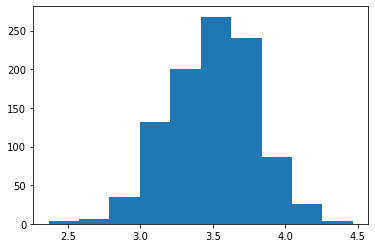

In [245]:
from numpy.random import randint
import numpy 

# Create a sample of 10 die rolls
small = randint(1, 7, 10)

# Calculate and print the mean of the sample
small_mean = numpy.mean(small)
print(small_mean)

# Create a sample of 1000 die rolls
large = randint(1, 7, 1000)

# Calculate and print the mean of the large sample
large_mean = numpy.mean(large)
print(large_mean)


#simulate central theorem

#Create a list named means with 1000 sample means from samples of 30 rolled dice by using list comprehension.
# Create a list of 1000 sample means of size 30
means = [randint(1, 7, 30).mean() for i in range(1000)]
#print(means)

#Create and show a histogram of the means using the hist() function; examine the shape of the distribution.
# Create and show a histogram of the means
plt.hist(means)
plt.show()

#Adapt your code to visualize only 100 samples in the means list; did the distribution change at all?

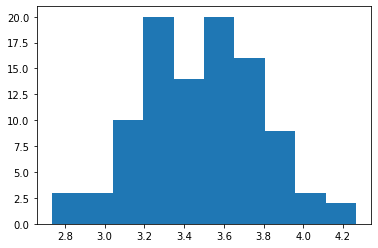

In [246]:
#Adapt code to visualize only 100 samples in the means list; did the distribution change at all?
from numpy.random import randint
import random

# Adapt code for 100 samples of size 30
means = [randint(1, 7, 30).mean() for i in range(100)]

# Create and show a histogram of the means
plt.hist(means)
plt.show()

## Probability distributions

### Bernoulli Distribution

Generate sample data for a Bernoulli event and then examine the visualization produced.

* Generate a sample using the rvs() function with size set to 100; assign it to the data variable.

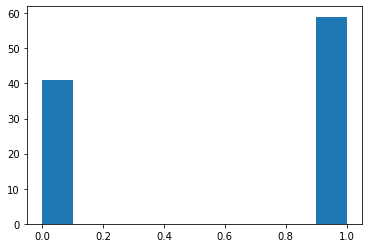

In [259]:
# Generate bernoulli data
from scipy.stats import bernoulli
#p=0.5 because we are looking at a fair coin
data = bernoulli.rvs(p=0.5, size=100)

# Plot distribution
plt.hist(data)
plt.show()

### Binomial Distribution

about
* used to model the number of successful outcomes in trials where there is some consistent probability of success.

exercise
* consider a game where you are trying to make a ball in a basket. You are given 10 shots and you know that you have an 80% chance of making a given shot. Assume each shot is an independent event. 

Notes:
Assign the probability of making 8 or less shots to prob1.
Assign the probability of making all 10 shots to prob2.

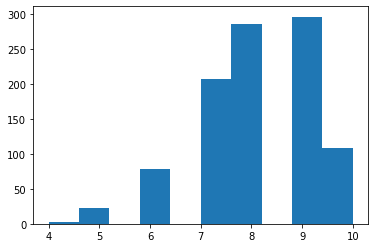

0.6241903615999999
0.10737418240000006


In [260]:
# Generate binomial data
from scipy.stats import binom
data = binom.rvs(n=10, p=0.8, size=1000)

# Plot the distribution
plt.hist(data)
plt.show()

# Assign and print probability of 8 or less successes
prob1 = binom.cdf(k=8, n=10, p=0.8)
print(prob1)

# Assign and print probability of all 10 successes
prob2 = binom.pmf(k=10, n=10, p=0.8)
print(prob2)

### Normal (Gaussian) distribution

exercise
* Given a standardized normal distribution, what is the probability of an observation greater than 2?
* Looking at our sample, what is the probability of an observation greater than 2?


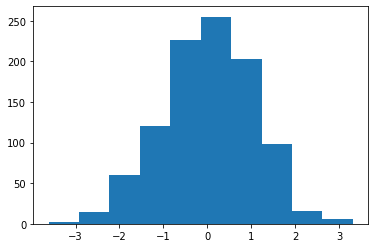

0.02275013194817921
0.016


In [261]:
# Generate normal data
from scipy.stats import norm
data = norm.rvs(size=1000)

# Plot distribution
plt.hist(data)
plt.show()

#Given a standardized normal distribution, what is the probability of an observation greater than 2?
# Compute and print true probability for greater than 2
true_prob = 1 - norm.cdf(2)
print(true_prob)

#Looking at our sample, what is the probability of an observation greater than 2?
# Compute and sample probability for greater than 2
sample_prob = sum(i > 2 for i in data) / len(data)
print(sample_prob)

* Q?: Person A decides to go on a sky diving trip. Based on his research, the probability of a glitch resulting in death is 0.001. If A goes on 500 sky dives, what is the probability of death?

bayes theorem examples:
https://dev.to/xsabzal/conditional-probability-and-bayes-theorem-examples-onk

## Pearson Correlation

data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358


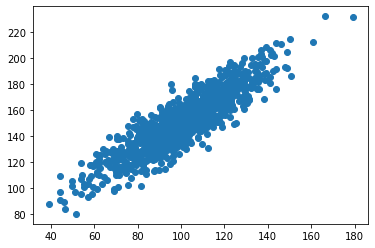

In [271]:
# generate related variables
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
# seed random number generator
seed(1)
# prepare data (two arrays)
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
# plot
plt.scatter(data1, data2)
plt.show()

### Calculate covariance

In [274]:
covariance = np.cov(data1, data2)
covariance

array([[385.33297729, 389.7545618 ],
       [389.7545618 , 500.38006058]])

Observation: The covariance between the two variables is 389.75. We can see that it is positive, suggesting the variables change in the same direction as we expect.

### Pearson's correlation

In [277]:
from scipy.stats import pearsonr

# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.888


### Spearman's correlation

In [278]:
from scipy.stats import spearmanr

# calculate spearman's correlation
corr, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.872


## Confidence Intervals

In [ ]:
import scipy.stats

#calculating the 95% confidence interval of data
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [ ]:
#calculating the 95% confidence interval of the mean of array a - alternative to previous:
scipy.stats.t.interval(0.95, loc=np.mean(a), scale=st.sem(a))


In [280]:
#alternative to estimate confidence interval
from scipy.stats import t
x = np.random.normal(size=100)
m = x.mean()
s = x.std()
dof = len(x)-1
confidence = 0.95
t_crit = np.abs(t.ppf((1-confidence)/2,dof))
(m-s*t_crit/np.sqrt(len(x)), m+s*t_crit/np.sqrt(len(x)))


(-0.2432898570231422, 0.12668779965638471)

### One sample z-test

In [281]:
from statsmodels.stats.weightstats import ztest as ztest
data = [88, 92, 94, 94, 96, 97, 97, 97, 99, 99,
        105, 109, 109, 109, 110, 112, 112, 113, 114, 115]

#perform one sample z-test
ztest(data, value=100)

(1.5976240527147705, 0.1101266701438426)

The test statistic for the one sample z-test is 1.5976 and the corresponding p-value is 0.1101.

Since this p-value is not less than .05, we do not have sufficient evidence to reject the null hypothesis. In other words, x does not significantly affect y (with y been the output after applying x).

### Two sample z-test

In [282]:
from statsmodels.stats.weightstats import ztest as ztest

#enter IQ levels for 20 individuals from each city
sample_a = [82, 84, 85, 89, 91, 91, 92, 94, 99, 99,
         105, 109, 109, 109, 110, 112, 112, 113, 114, 114]

sample_b = [90, 91, 91, 91, 95, 95, 99, 99, 108, 109,
         109, 114, 115, 116, 117, 117, 128, 129, 130, 133]

#perform two sample z-test
ztest(sample_a, sample_b, value=0) 



(-1.9953236073282115, 0.046007596761332065)

The test statistic for the two sample z-test is -1.9953 and the corresponding p-value is 0.0460.

Since this p-value is less than .05, we have sufficient evidence to reject the null hypothesis. In other words, the mean IQ level is significantly different between the two cities.

## T-test

Hypotheses
Now, when performing t-tests you typically have the following two hypotheses:

Null hypotheses: Two group means are equal
Alternative hypotheses: Two group means are different (two-tailed)

Assumption 1: Are the two samples independent?
Assumption 2: Are the data from each of the 2 groups following a normal distribution?
Assumption 3: Do the two samples have the same variances (Homogeneity of Variance)?

In [283]:
example_data = 'https://gist.githubusercontent.com/baskaufs/1a7a995c1b25d6e88b45/raw/4bb17ccc5c1e62c27627833a4f25380f27d30b35/t-test.csv'
df = pd.read_csv(example_data)

df.head()

,grouping,height
0,men,181.5
1,men,187.3
2,men,175.3
3,men,178.3
4,men,169.0


In [287]:
#checking data

import scipy
# Subset data
male = df.query('grouping == "men"')['height']
female = df.query('grouping == "women"')['height']
#Checking the Normality of Data
print(scipy.stats.shapiro(male))
print(scipy.stats.shapiro(female))
#Checking the Homogeneity of Variances Assumption in Python
print(scipy.stats.levene(male, female))

ShapiroResult(statistic=0.9550848603248596, pvalue=0.7756242156028748)
ShapiroResult(statistic=0.9197608828544617, pvalue=0.467536598443985)
LeveneResult(statistic=0.026695150465104206, pvalue=0.8729335280501348)


observations:

* shapiro results: null hypothesis is that the data follows a normal distribution. Thus, we can infer that the data from both groups is normally distributed.
* p-value suggests that the data follows the assumption of equal variances. If data does not fulfill the assumption of equal variances, we can use Welch’s t-test instead of t-test.

In [290]:
#performing t-test
res = scipy.stats.ttest_ind(male, female, 
                      equal_var=True)

display(res)

#note:  If data violate the second assumption (equal variances) set the equal_var parameter to False.


Ttest_indResult(statistic=2.765444762721087, pvalue=0.017105701528166175)

In [291]:
#alternative with statsmodel
from statsmodels.stats.weightstats import ttest_ind

ttest_ind(male, female)

(2.7654447627210694, 0.017105701528166727, 12.0)

In [295]:
#two sample t-test with pingouin
import pingouin as pg
res = pg.ttest(male, female, correction=False)
display(res)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.765445,12,two-sided,0.017106,"[1.87, 15.76]",1.478192,3.601,0.718909


T: t-value
dof: degrees of freedom
p-val: p-value
CI95%: confidence interval
cohen-d : cohen's d

There was a significant difference in height for men (M = 179.87, SD = 6.21) and women (M = 171.05, SD = 5.69); t(12) = 2.77, p = .017, %95 CI [1.87, 15.76], d = 1.48.

<AxesSubplot:xlabel='grouping', ylabel='height'>

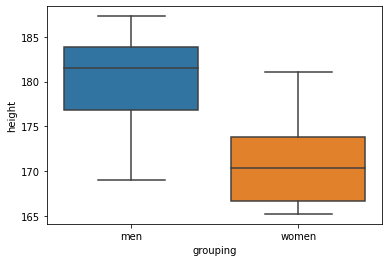

In [296]:
#visualize data with boxplots
import seaborn as sns

sns.boxplot(x='grouping', y='height', data=df)

## Remove outliers

In [304]:
#filter out outliers based on zscore (df from previous step)
df_no_outliers = df[(np.abs(scipy.stats.zscore(df[['height']])) < 3).all(axis=1)]
df_no_outliers.head()

,grouping,height
0,men,181.5
1,men,187.3
2,men,175.3
3,men,178.3
4,men,169.0


## Bonferroni Correction

(multiple comparison corrections)

In [412]:
rvs1 = scipy.stats.norm.rvs(loc=5, scale=10, size=1000, random_state=0)
rvs2 = scipy.stats.norm.rvs(loc=6.5, scale=8, size=1000, random_state=0)

In [413]:
rvs1

array([ 2.26405235e+01,  9.00157208e+00,  1.47873798e+01,  2.74089320e+01,
        2.36755799e+01, -4.77277880e+00,  1.45008842e+01,  3.48642792e+00,
        3.96781148e+00,  9.10598502e+00,  6.44043571e+00,  1.95427351e+01,
        1.26103773e+01,  6.21675016e+00,  9.43863233e+00,  8.33674327e+00,
        1.99407907e+01,  2.94841736e+00,  8.13067702e+00, -3.54095739e+00,
       -2.05298982e+01,  1.15361860e+01,  1.36443620e+01, -2.42165020e+00,
        2.76975462e+01, -9.54365675e+00,  5.45758517e+00,  3.12816150e+00,
        2.03277921e+01,  1.96935877e+01,  6.54947426e+00,  8.78162520e+00,
       -3.87785748e+00, -1.48079647e+01,  1.52087851e+00,  6.56348969e+00,
        1.73029068e+01,  1.70237985e+01,  1.12673183e+00,  1.97697249e+00,
       -5.48552965e+00, -9.20017937e+00, -1.20627019e+01,  2.45077540e+01,
       -9.65218175e-02,  6.19256984e-01, -7.52795360e+00,  1.27749036e+01,
       -1.11389785e+01,  2.87259720e+00, -3.95466561e+00,  8.86902498e+00,
       -1.08051376e-01, -

In [417]:
#t-test analysis
def t_test_function(rvs, alpha, no_test):
    counter = 0
    for i in range(no_test):
        rvs_random = scipy.stats.norm.rvs(loc=5, scale=10, size=1000, random_state=i+1)

        statistic, pvalue = scipy.stats.ttest_ind(rvs, rvs_random, equal_var=False)

        if pvalue <= alpha:
            counter = counter + 1

    print(counter)

In [418]:
t_test_function(rvs1, alpha=0.05, no_test=100)
t_test_function(rvs2, alpha=0.05, no_test=100)


11
85


In [419]:
#bonferroni correction
def bonferroni_correction_function(rvs, alpha, no_test):
    alpha_bonferroni = alpha/no_test
    
    counter = 0
    for i in range(no_test):
        rvs_random = scipy.stats.norm.rvs(loc=5, scale=10, size=1000, random_state=i+1)

        statistic, pvalue = scipy.stats.ttest_ind(rvs, rvs_random, equal_var=False)

        if pvalue <= alpha_bonferroni:
            counter = counter + 1

    print(counter)

In [420]:
bonferroni_correction_function(rvs1, alpha=0.05, no_test=100)
bonferroni_correction_function(rvs2, alpha=0.05, no_test=100)


0
18


In [421]:
#bonferroni holm correction
def bonferroni_holm_correction_function(rvs, alpha, no_test):
    pvalue_test = []
    for i in range(no_test):
        rvs_random = scipy.stats.norm.rvs(loc=5, scale=10, size=1000, random_state=i+1)

        statistic, pvalue = scipy.stats.ttest_ind(rvs, rvs_random, equal_var=False)
        pvalue_test.append(pvalue)
        
    pvalue_test_sorted = sorted(pvalue_test, key=float)
    
    counter = 0
    for i in range(no_test):
        if pvalue_test_sorted[i] <= alpha/(no_test-i):
            counter = counter + 1

    print(counter)

In [422]:
bonferroni_holm_correction_function(rvs1, alpha=0.05, no_test=100)
bonferroni_holm_correction_function(rvs2, alpha=0.05, no_test=100)



0
19


## Calculate sample size for a study

## sample size for a 2 independent sample t-test 

In [453]:
from statsmodels.stats.power import tt_ind_solve_power

mean_diff, sd_diff = 0.5, 0.5
std_effect_size = mean_diff / sd_diff

n = tt_ind_solve_power(effect_size=std_effect_size, alpha=0.05, power=0.8, ratio=1, alternative='two-sided')
print('Number in *each* group: {:.5f}'.format(n))



Number in *each* group: 16.71472


In [454]:
for sd in [0.4, 0.5, 0.6]:
    n = tt_ind_solve_power(effect_size=mean_diff/sd, alpha=0.05, power=0.8, ratio=1, alternative='two-sided')
    print('Number in *each* group when SD is {:<4.1f}: {:.2f}'.format(sd, n))


Number in *each* group when SD is 0.4 : 11.09
Number in *each* group when SD is 0.5 : 16.71
Number in *each* group when SD is 0.6 : 23.60


## sample size for a paired t-test 

In [456]:
from statsmodels.stats.power import tt_solve_power

for mean_diff in [0.5, 0.4, 0.3]:
    n = tt_solve_power(effect_size=mean_diff/sd_diff, alpha=0.05, power=0.8, alternative='two-sided')
    print('Number in the group when paired standardised mean difference is {:<4.2f}: {:.2f}'.format(mean_diff, n))

Number in the group when paired standardised mean difference is 0.50: 9.94
Number in the group when paired standardised mean difference is 0.40: 14.30
Number in the group when paired standardised mean difference is 0.30: 23.79


### sample size precision planning

Most sample size calculations for independent or paired samples are performed based on power to detect an effect of a certain size, assuming there’s no effect. Instead, Cumming and Calin-Jageman recommend that readers plan studies to detect precise effects.
The 95% confidence interval (CI) indicates precision about effects. Therefore, it is possible to plan studies to detect narrow 95% CIs about effects, instead of plan studies to detect the existence of effects.

In [457]:
z = 1.96
fractions = [0.4, 0.5, 0.6] # fractions of population SD

for f in fractions:
    print('\nFraction of population SD: {}'.format(f))

    # Two independent groups
    N = 2 * (z/f)**2 # z assumes population SD is known
    print('N in *each* group: {:.2f}'.format(N))

    # Paired groups
    rho = 0.4 # correlation in population between the two measures
    N = 2 * (1 - rho) * (z/f)**2
    print('N of paired group: {:.2f}'.format(N))



Fraction of population SD: 0.4
N in *each* group: 48.02
N of paired group: 28.81

Fraction of population SD: 0.5
N in *each* group: 30.73
N of paired group: 18.44

Fraction of population SD: 0.6
N in *each* group: 21.34
N of paired group: 12.81


## Label Encoding

### Encoding categorical values

In [305]:
#new sample data

# Define the headers since the data does not have any
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

# Read in the CSV file and convert "?" to NaN
sample_data2 = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
                  header=None, names=headers, na_values="?" )
sample_data2.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


what we want: Encode  body_style column to the following labels
* convertible -> 0
* hardtop -> 1
* hatchback -> 2
* sedan -> 3
* wagon -> 4


In [309]:
sample_data2["body_style"] = sample_data2["body_style"].astype('category')
sample_data2["body_style_cat"] = sample_data2["body_style"].cat.codes
sample_data2.head(5)
#sample_data2.dtypes

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,body_style_cat
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,2
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,3
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,3


### One Hot Encoding

create dummy variables for column `drive_wheels`


In [310]:
pd.get_dummies(sample_data2, columns=["drive_wheels"]).head()


,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,engine_location,wheel_base,length,...,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,body_style_cat,drive_wheels_4wd,drive_wheels_fwd,drive_wheels_rwd
0,3,NaN,alfa-romero,gas,std,two,convertible,front,88.6,168.8,...,9.0,111.0,5000.0,21,27,13495.0,0,0,0,1
1,3,NaN,alfa-romero,gas,std,two,convertible,front,88.6,168.8,...,9.0,111.0,5000.0,21,27,16500.0,0,0,0,1
2,1,NaN,alfa-romero,gas,std,two,hatchback,front,94.5,171.2,...,9.0,154.0,5000.0,19,26,16500.0,2,0,0,1
3,2,164.0,audi,gas,std,four,sedan,front,99.8,176.6,...,10.0,102.0,5500.0,24,30,13950.0,3,0,1,0
4,2,164.0,audi,gas,std,four,sedan,front,99.4,176.6,...,8.0,115.0,5500.0,18,22,17450.0,3,1,0,0


## Custom Binary Encoding

In [311]:
sample_data2["OHC_Code"] = np.where(sample_data2["engine_type"].str.contains("ohc"), 1, 0)
sample_data2.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,body_style_cat,OHC_Code
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,0,1
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,0,1
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,2,1
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,3,1
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,3,1


## Linear Regression

In [327]:
Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

sample_data3 = pd.DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price']) 



Text(0.5, 1.0, 'apple_search_spend ')

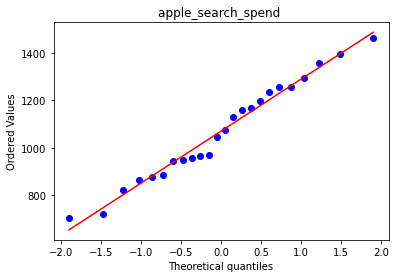

In [386]:
#check normality of independent variables (here only checking for stock index)
ax1 = plt.subplot()
res = scipy.stats.probplot(sample_data3['Stock_Index_Price'].to_numpy(), dist="norm", plot=plt)
ax1.set_title("apple_search_spend ")


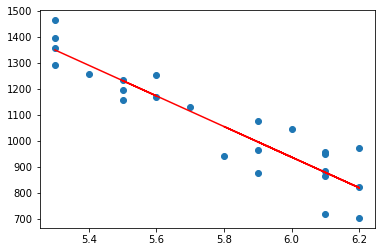

In [337]:
from sklearn.linear_model import LinearRegression
X = sample_data3.iloc[:, 3].values.reshape(-1, 1)  # values converts it into a numpy array
Y = sample_data3.iloc[:, 4].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
#X = sm.add_constant(X) # adding a constant
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()


In [376]:
#alternative Linear regression
mix_x = sample_data3['Unemployment_Rate'].values.reshape(-1, 1)
mix_y = sample_data3['Stock_Index_Price'].values.reshape(-1, 1)

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(mix_x, mix_y, test_size=0.2, random_state=66)

reg = LinearRegression()
linear_result= reg.fit(X_train, y_train)
print("Model Performance: ", reg.score(X_test, y_test))
print(reg.intercept_)
print(reg.coef_)


y_pred = reg.predict(X_test)
y_pred


Model Performance:  0.9128032659384013
[4484.12909203]
[[-591.5009265]]


array([[1349.17418159],
       [ 875.9734404 ],
       [1290.02408894],
       [1171.72390364],
       [1349.17418159]])

### Evaluate linear regression

In [378]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))


MAE 45.06534898085211


Advantages of MAE

* The MAE you get is in the same unit as the output variable.
* It is most Robust to outliers.

Disadvantages of MAE

* The graph of MAE is not differentiable so we have to apply various optimizers like Gradient descent which can be differentiable.

In [379]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 2631.2625985202526


Advantages of MSE

* The graph of MSE is differentiable, so you can easily use it as a loss function.

Disadvantages of MSE

* The value you get after calculating MSE is a squared unit of output. for example, the output variable is in meter(m) then after calculating MSE the output we get is in meter squared.
* If you have outliers in the dataset then it penalizes the outliers most and the calculated MSE is bigger. So, in short, It is not Robust to outliers which were an advantage in MAE.

In [380]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))


RMSE 51.29583412442235


Advantages of RMSE
* The output value you get is in the same unit as the required output variable which makes interpretation of loss easy.

Disadvantages of RMSE
* It is not that robust to outliers as compared to MAE.
for performing RMSE we have to NumPy NumPy square root function over MSE.

In [381]:
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))


RMSE 3.9376095427277145


Taking the log of the RMSE metric slows down the scale of error. The metric is very helpful when you are developing a model without calling the inputs. In that case, the output will vary on a large scale.

In [382]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.9128032659384013


R2 score is a metric that tells the performance of your model, not the loss in an absolute sense that how many wells did your model perform.

In contrast, MAE and MSE depend on the context as we have seen whereas the R2 score is independent of context.

So, with help of R squared we have a baseline model to compare a model which none of the other metrics provides. The same we have in classification problems which we call a threshold which is fixed at 0.5. So basically R2 squared calculates how must regression line is better than a mean line.

Hence, R2 squared is also known as Coefficient of Determination or sometimes also known as Goodness of fit

In [383]:
#adjusted R squared
n=40
k=2
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print(adj_r2_score)

0.9080899289620987


The disadvantage of the R2 score is while adding new features in data the R2 score starts increasing or remains constant but it never decreases because It assumes that while adding more data variance of data increases.

But the problem is when we add an irrelevant feature in the dataset then at that time R2 sometimes starts increasing which is incorrect.

Hence, To control this situation Adjusted R Squared came into existence.

### check if results hold assumptions

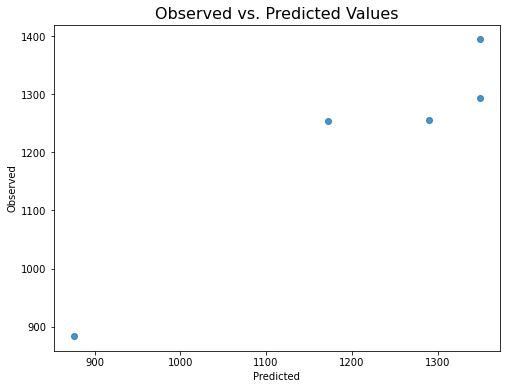

In [390]:
#linearity test (regression)
def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''


    fig, ax = plt.subplots(figsize=(8,6))
    
    sns.regplot(x=y_pred, y=y_test, lowess=True, ax=ax, line_kws={'color': 'red'})
    ax.set_title('Observed vs. Predicted Values', fontsize=16)
    ax.set(xlabel='Predicted', ylabel='Observed')

    #sns.regplot(x=predicted_values, y=model_residuals, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    #ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    #ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(reg, y)


## Regression Ordinary Least Squares

In [334]:
#ols
import statsmodels.api as sm

X = sample_data3[['Interest_Rate','Unemployment_Rate']] # here we have 2 variables for the multiple linear regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example
Y = sample_data3['Stock_Index_Price']
X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:      Stock_Index_Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           4.04e-11
Time:                        18:04:09   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1798.4040    899.24

/Users/constantina_mac/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Interpreting Regression Results
* Adjusted. R-squared reflects the fit of the model. R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
* const coefficient is your Y-intercept. It means that if both the Interest_Rate and Unemployment_Rate coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.
* Interest_Rate coefficient represents the change in the output Y due to a change of one unit in the interest rate (everything else held constant)
* Unemployment_Rate coefficient represents the change in the output Y due to a change of one unit in the unemployment rate (everything else held constant)
* std err reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy
* P >|t| is your p-value. A p-value of less than 0.05 is considered to be statistically significant
* Confidence Interval represents the range in which our coefficients are likely to fall (with a likelihood of 95%)

### Making Predictions based on the Regression Results

* Y = C + M1*X1 + M2*X2 + …


In [318]:
#Stock_Index_Price = (const coef) + (Interest_Rate coef)*X1 + (Unemployment_Rate coef)*X2
#Stock_Index_Price = (1798.4040) + (345.5401)*X1 + (-250.1466)*X2 --> plugging numbers calculated

#checking stock index price for specific values 
Stock_Index_Price
Stock_Index_Price = (1798.4040) + (345.5401)*(2.75) + (-250.1466)*(5.3) 

1422.862295

## Logistic Regression

In [348]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [349]:
x

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [350]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [351]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='liblinear', random_state=0)


In [352]:
model.fit(x, y)


LogisticRegression(random_state=0, solver='liblinear')

In [355]:
print(model.intercept_)
print(model.coef_)

[-1.04608067]
[[0.51491375]]


### Evaluate logistic regression


In [361]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [356]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [357]:
#actual prediction to compare
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [358]:
#percentage of observations classify correctly
model.score(x, y)

0.9

In [359]:
#create confusion matrix
confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]])

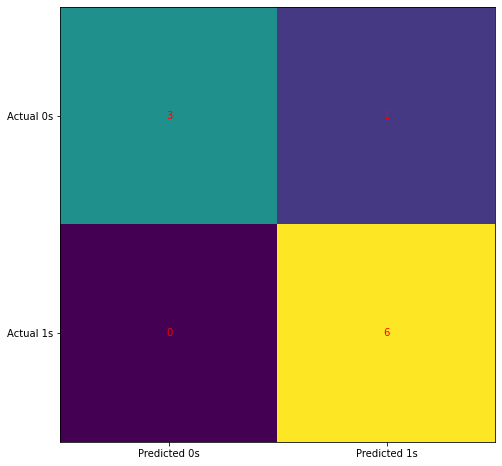

In [360]:
#visualize confusion matrix
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

Observations:

The obtained matrix shows the following:
* Three true negative predictions: The first three observations are zeros predicted correctly.
* No false negative predictions: These are the ones wrongly predicted as zeros.
* One false positive prediction: The fourth observation is a zero that was wrongly predicted as one.
* Six true positive predictions: The last six observations are ones predicted correctly.


### Summarize logistic regression results

In [369]:
print('y:', y, sep='\n', end='\n\n')
print('intercept:', model.intercept_)
print('coef:', model.coef_, end='\n\n')
print('p_pred:', model.predict_proba(x), sep='\n', end='\n\n')
print('y_pred:', y_pred, end='\n\n')
print('score_:', model.score(x, y), end='\n\n')
print('conf_m:', confusion_matrix(y, model.predict(x)), sep='\n', end='\n\n')
print('report:', classification_report(y, model.predict(x)), sep='\n')



Summary:
y:
[0 0 0 0 1 1 1 1 1 1]

intercept: [-1.04608067]
coef: [[0.51491375]]

p_pred:
[[0.74002157 0.25997843]
 [0.62975524 0.37024476]
 [0.5040632  0.4959368 ]
 [0.37785549 0.62214451]
 [0.26628093 0.73371907]
 [0.17821501 0.82178499]
 [0.11472079 0.88527921]
 [0.07186982 0.92813018]
 [0.04422513 0.95577487]
 [0.02690569 0.97309431]]

y_pred: [[1349.17418159]
 [ 875.9734404 ]
 [1290.02408894]
 [1171.72390364]
 [1349.17418159]]

score_: 0.9

conf_m:
[[3 1]
 [0 6]]

report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



## Variable/Features correlations

In [371]:
#correlation with arrays
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
r = np.corrcoef(x, y)
r



array([[1.        , 0.75864029],
       [0.75864029, 1.        ]])

In [373]:
data = {'A': [45,37,42,35,39],
        'B': [38,31,26,28,33],
        'C': [10,15,17,21,12]
        }

sample_data5 = pd.DataFrame(data,columns=['A','B','C'])
sample_data5.head()

,A,B,C
0,45,38,10
1,37,31,15
2,42,26,17
3,35,28,21
4,39,33,12


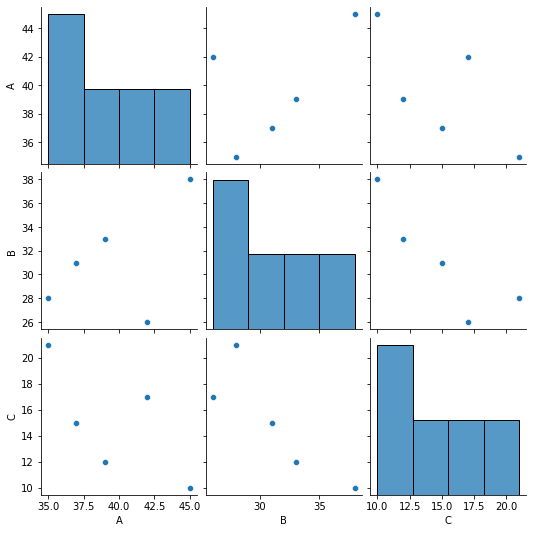

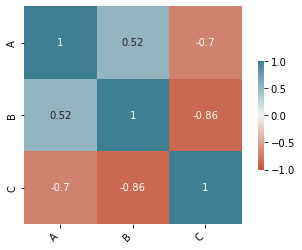

In [374]:
##correlations when working with dataframes

sns.pairplot(sample_data5)

corr = sample_data5.corr()

fig, ax = plt.subplots()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    cbar_kws={"shrink": 0.5}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

plt.show()


## Create training-testing sample

In [394]:
sample6 = pd.DataFrame(np.random.randn(100, 2))
sample6

,0,1
0,0.482598,-1.105432
1,0.420755,1.616794
2,-0.883771,0.298835
3,0.767113,-1.693349
4,1.638889,-1.044998
...,...,...
95,0.279401,0.114784
96,-1.558594,-0.849519
97,1.152007,0.175928
98,0.638986,1.020153


In [395]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(sample6, test_size=0.2)

In [399]:
train.shape

(80, 2)

In [400]:
test.shape

(20, 2)

### time series test/training datasets


In [401]:
date_rng = pd.date_range(start='1/1/2018', end='1/08/2018', freq='H')
date_rng

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00', '2018-01-01 05:00:00',
               '2018-01-01 06:00:00', '2018-01-01 07:00:00',
               '2018-01-01 08:00:00', '2018-01-01 09:00:00',
               ...
               '2018-01-07 15:00:00', '2018-01-07 16:00:00',
               '2018-01-07 17:00:00', '2018-01-07 18:00:00',
               '2018-01-07 19:00:00', '2018-01-07 20:00:00',
               '2018-01-07 21:00:00', '2018-01-07 22:00:00',
               '2018-01-07 23:00:00', '2018-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [405]:
date_rng_df = pd.DataFrame(date_rng, columns=['date'])
date_rng_df['data'] = np.random.randint(0,100,size=(len(date_rng)))
date_rng_df.head(15)

,date,data
0,2018-01-01 00:00:00,99
1,2018-01-01 01:00:00,6
2,2018-01-01 02:00:00,84
3,2018-01-01 03:00:00,67
4,2018-01-01 04:00:00,77
5,2018-01-01 05:00:00,33
6,2018-01-01 06:00:00,91
7,2018-01-01 07:00:00,51
8,2018-01-01 08:00:00,36
9,2018-01-01 09:00:00,33


In [407]:
date_rng_df.shape

(169, 2)

In [406]:
#train/test datasets
n = date_rng_df.shape[0]
train_size = 0.85
total_installs_train = date_rng_df.iloc[:int(n * train_size)]
total_installs_test = date_rng_df.iloc[int(n * train_size):]
print(f'train set size: {len(total_installs_train)}')
print(f'test set size: {len(total_installs_test)}')

train set size: 143
test set size: 26


In [409]:
total_installs_train.tail()

,date,data
138,2018-01-06 18:00:00,43
139,2018-01-06 19:00:00,81
140,2018-01-06 20:00:00,17
141,2018-01-06 21:00:00,88
142,2018-01-06 22:00:00,53


In [410]:
total_installs_test.head()

,date,data
143,2018-01-06 23:00:00,50
144,2018-01-07 00:00:00,75
145,2018-01-07 01:00:00,6
146,2018-01-07 02:00:00,36
147,2018-01-07 03:00:00,99


## Classification Evaluation

In [427]:
# read data and create a model and kfolds
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
model = LogisticRegression(solver='liblinear')


### Classification Accuracy

Classification accuracy is the number of correct predictions made as a ratio of all predictions made.

This is the most common evaluation metric for classification problems, it is also the most misused. It is really only suitable when there are an equal number of observations in each class (which is rarely the case) and that all predictions and prediction errors are equally important, which is often not the case.

In [428]:
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.771 (0.051)


### Log Loss

Logistic loss (or log loss) is a performance metric for evaluating the predictions of probabilities of membership to a given class.

The scalar probability between 0 and 1 can be seen as a measure of confidence for a prediction by an algorithm. Predictions that are correct or incorrect are rewarded or punished proportionally to the confidence of the prediction.

In [429]:
scoring = 'neg_log_loss'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

Logloss: -0.494 (0.042)


### Area Under ROC Curve
Area Under ROC Curve (or ROC AUC for short) is a performance metric for binary classification problems.

The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.

A ROC Curve is a plot of the true positive rate and the false positive rate for a given set of probability predictions at different thresholds used to map the probabilities to class labels. The area under the curve is then the approximate integral under the ROC Curve.

In [430]:
scoring = 'roc_auc'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

AUC: 0.826 (0.050)


### Confusion Matrix

In [431]:
test_size = 0.33
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=7)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[141  21]
 [ 41  51]]


### Classification Report

In [432]:
test_size = 0.33
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=7)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

         0.0       0.77      0.87      0.82       162
         1.0       0.71      0.55      0.62        92

    accuracy                           0.76       254
   macro avg       0.74      0.71      0.72       254
weighted avg       0.75      0.76      0.75       254



## Handling null values in Pandas

In [433]:
# dictionary of lists
dict = {'First Score':[100, 90, np.nan, 95],
        'Second Score': [30, 45, 56, np.nan],
        'Third Score':[np.nan, 40, 80, 98]}
  
# creating a dataframe using dictionary
sample7 = pd.DataFrame(dict)
  
# using notnull() function 
sample7.notnull()

,First Score,Second Score,Third Score
0,True,True,False
1,True,True,True
2,False,True,True
3,True,False,True


In [434]:
#fill with 0
sample7.fillna(0)


,First Score,Second Score,Third Score
0,100.0,30.0,0.0
1,90.0,45.0,40.0
2,0.0,56.0,80.0
3,95.0,0.0,98.0


In [435]:
#fill with previous value
sample7.fillna(method ='pad')


,First Score,Second Score,Third Score
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,90.0,56.0,80.0
3,95.0,56.0,98.0


In [436]:
#fill with next one
sample7.fillna(method ='bfill')


,First Score,Second Score,Third Score
0,100.0,30.0,40.0
1,90.0,45.0,40.0
2,95.0,56.0,80.0
3,95.0,NaN,98.0


In [437]:
##replace with specific value
sample7.replace(to_replace = np.nan, value = -99) 


,First Score,Second Score,Third Score
0,100.0,30.0,-99.0
1,90.0,45.0,40.0
2,-99.0,56.0,80.0
3,95.0,-99.0,98.0


In [438]:
#interpolate missing values
sample7.interpolate(method ='linear', limit_direction ='forward')


,First Score,Second Score,Third Score
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,92.5,56.0,80.0
3,95.0,56.0,98.0


In [439]:
#replace with mean of column
sample7.fillna(sample7.mean())

,First Score,Second Score,Third Score
0,100.0,30.000000,72.666667
1,90.0,45.000000,40.000000
2,95.0,56.000000,80.000000
3,95.0,43.666667,98.000000


In [444]:
#replace only in one column
sample7['First Score'] = sample7['First Score'].fillna((sample7['First Score'].mean()))
sample7

,First Score,Second Score,Third Score
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,95.0,56.0,80.0
3,95.0,NaN,98.0


## Create rolling average column

In [445]:
product = {'month' : [1,2,3,4,5,6,7,8,9,10,11,12],'demand':[290,260,288,300,310,303,329,340,316,330,308,310]}
sample8 = pd.DataFrame(product)
sample8

,month,demand
0,1,290
1,2,260
2,3,288
3,4,300
4,5,310
5,6,303
6,7,329
7,8,340
8,9,316
9,10,330


In [448]:
#create with a loop
for i in range(0,sample8.shape[0]-2):
    sample8.loc[sample8.index[i+2],'SMA_3'] = np.round(((sample8.iloc[i,1]+ sample8.iloc[i+1,1] +sample8.iloc[i+2,1])/3),1)
    
sample8.head()

,month,demand,SMA_3
0,1,290,NaN
1,2,260,NaN
2,3,288,279.3
3,4,300,282.7
4,5,310,299.3


In [450]:
#alternative easier solution
sample8['pandas_SMA_3'] = sample8.iloc[:,1].rolling(window=3).mean()
sample8.head()

,month,demand,SMA_3,pandas_SMA_3
0,1,290,NaN,NaN
1,2,260,NaN,NaN
2,3,288,279.3,279.333333
3,4,300,282.7,282.666667
4,5,310,299.3,299.333333
